# 2.1 Sampling random points within D- dimensional domains by hit and miss
Generate random points uniformly distributed within a rectangle $[a, b] \times [c, d]$ and compare the analytic value of the area $A = |ab| \cdot |cd|$ with the Monte Carlo estimate based on the hit-miss method as a function of the number of "throws".

##### Rectangle 
For the rectangle, we generate points $(x, y)$ with coordinates $x$, $y$ that are uniformly distributed random numbers within the larger rectangle, where $x \sim U(A, B)$ and $y \sim U(C, D)$. The ratio between points falling inside the smaller rectangle and the total number of points generated provides an estimate of the area of the smaller rectangle.

<img src="2_1.png" style="height:300px" />

The analytic area of the small rectangle is: 1 <br>
The Monte Carlo estimate based on the hit-miss varying the number of samples is:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

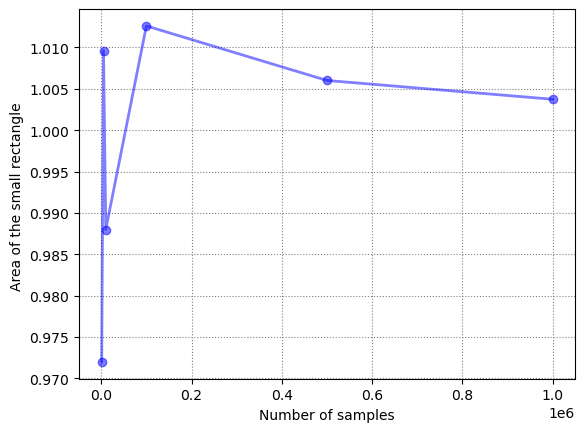

In [2]:
data = np.loadtxt("2.1_rect.txt")

plt.plot(data[:,0],data[:,1], 'o-', color = 'blue',linewidth = 2, alpha=0.5)
plt.xlabel('Number of samples')
plt.ylabel('Area of the small rectangle ')
plt.grid(color='grey', linestyle = 'dotted')
plt.show()

Note that as the samples are chosen randomly, there is significant variability in the plot's outcome each time the program is executed. To enhance the results, I try to run the process multiple times and then calculate the average outcome. For exemple this is the outcome with 3 runs:

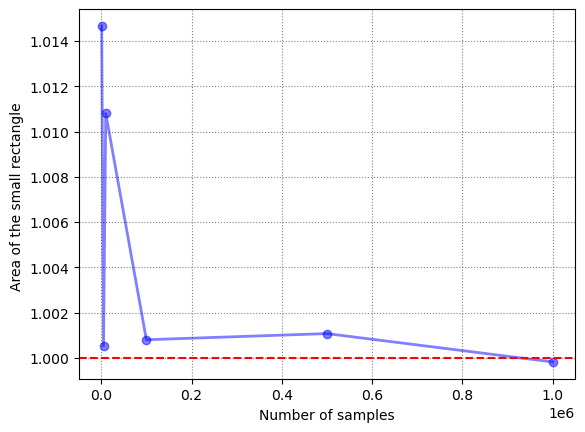

In [3]:
data_a = np.loadtxt("2.1_rect_a.txt")
data_b = np.loadtxt("2.1_rect_b.txt")
data_c = np.loadtxt("2.1_rect_c.txt")
x1 = data_a[:,1]
x2 = data_b[:,1]
x3 = data_c[:,1]
x = np.vstack((x1, x2, x3))
mean_x = np.mean(x, axis=0)

plt.plot(data[:,0],mean_x, 'o-', color = 'blue',linewidth = 2, alpha=0.5)
plt.xlabel('Number of samples')
plt.ylabel('Area of the small rectangle ')
plt.grid(color='grey', linestyle = 'dotted')
plt.axhline(y=1, color='red', linestyle='--', label="y = 1")
plt.show()

##### Disk 
For the disk, we apply the same logic: we generate points inside a square in the first quadrant $[0,1] x [0,1]$ that contains a quarter of the disk, and then we apply the condition for belonging to the disk, which is $x^2 + y^2 \leq 1$. The ratio of points that satisfy this equation to the total number of samples provides an estimate of the quarter of the area of the disk.
<img src="2_1b.png" style="height:300px" />

The analytic area of the circle is: 3.14159<br>
The Monte Carlo estimate based on the hit-miss varying the number of samples and averaging the results in 3 runs is<br>

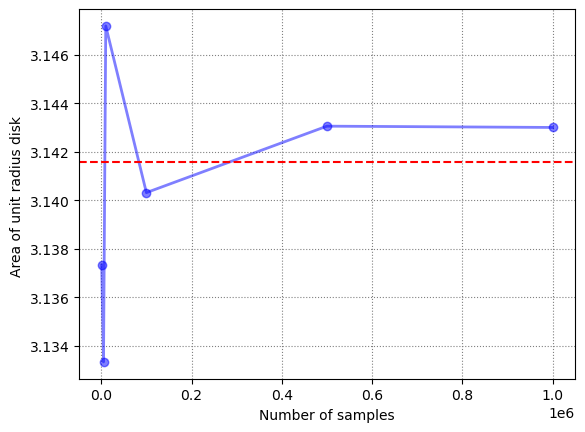

In [4]:
data_a = np.loadtxt("2.1_disk_a.txt")
data_b = np.loadtxt("2.1_disk_b.txt")
data_c = np.loadtxt("2.1_disk_c.txt")
x1 = data_a[:,1]
x2 = data_b[:,1]
x3 = data_c[:,1]
x = np.vstack((x1, x2, x3))
mean_x = np.mean(x, axis=0)

plt.plot(data[:,0],mean_x, 'o-', color = 'blue',linewidth = 2, alpha=0.5)
plt.xlabel('Number of samples')
plt.ylabel('Area of unit radius disk ')
plt.grid(color='grey', linestyle = 'dotted')
plt.axhline(y=np.pi, color='red', linestyle='--', label="y = 1")
plt.show()

# 2.2 Sampling random numbers from a given distribution
## 2.2.1 Inversion method

Use the inversion method to design an algorithm that samples random numbers according to the
power law probability distribution
$\rho (x) = c x^n $, with x in [0, 1]

First, calculate the Cumulative Distribution Function (CDF) of the given distribution. The CDF is defined as:
$CDF =\int_0^k c x^n \, dx = \frac{c k^{n+1}}{n+1} $

The CDF represents the cumulative probability up to 'k'.
Now, to ensure that the probability distribution is properly normalized (i.e., the area under the curve equals 1), we need to determine the value of the constant 'c'. We do this for two different values of 'n'.

$n=3 \rightarrow \int_0^1 c x^3 \, dx = \frac{c}{4} = 1 \rightarrow c=4$

$n=4 \rightarrow \int_0^1 c x^4 \, dx = \frac{c}{5} = 1 \rightarrow c=5$

Now, we want to sample random numbers from this distribution. To do this, we use the inverse CDF method. We set the CDF equal to a random number 'u' sampled from a uniform distribution between 0 and 1; then we solve for 'k' to obtain:

$\frac{c k^{n+1}}{n+1} = u \rightarrow k = \sqrt[n+1]{u\frac{n+1}{c}}, \quad u \sim U(0,1)$

In [5]:
def power (x, n, c):
    return c*x**(n)

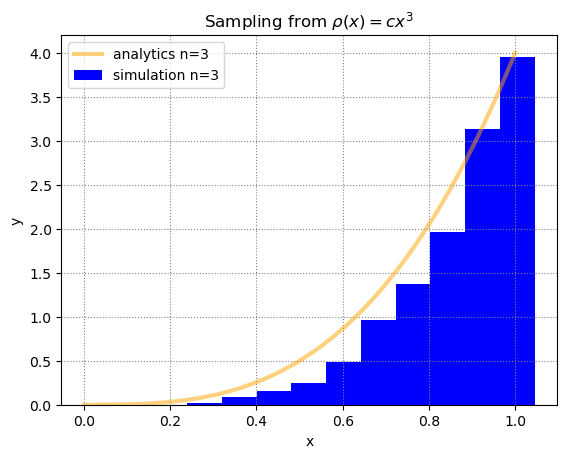

In [6]:
n = 3
c = 4

#simulation
x_sim = np.loadtxt("sampl_power_3.txt")
y_sim  = power(x_sim, n, c)

#analytics
x = np.linspace(0,1,len(x_sim))
y = power(x, n, c)

plt.plot(x,y, '-', label = 'analytics n=3', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation n=3', color = 'blue', density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^3 $')
plt.legend()
plt.show()

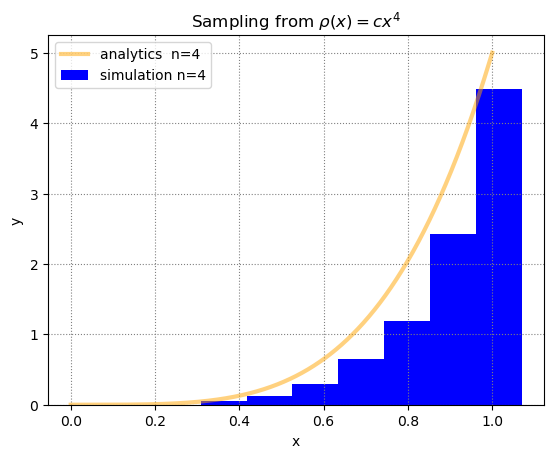

In [7]:
n = 4
c = 5

#simulation
x_sim = np.loadtxt("sampl_power_4.txt")
y_sim  = power(x_sim, n, c)

#analytics
x = np.linspace(0,1,len(x_sim))
y = power(x, n, c)

plt.plot(x,y, '-', label = 'analytics  n=4', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, bins=7, label = 'simulation n=4', color = 'blue', density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^4 $')
plt.legend()
plt.show()

Use the inversion method to design an algorithm that samples random numbers according to the
power law probability distribution
$\rho (x) = c x^n $, with x in [0, 2].

To solve this task we considered n=2 and we used the same logic as before except of changing the normalization constant.

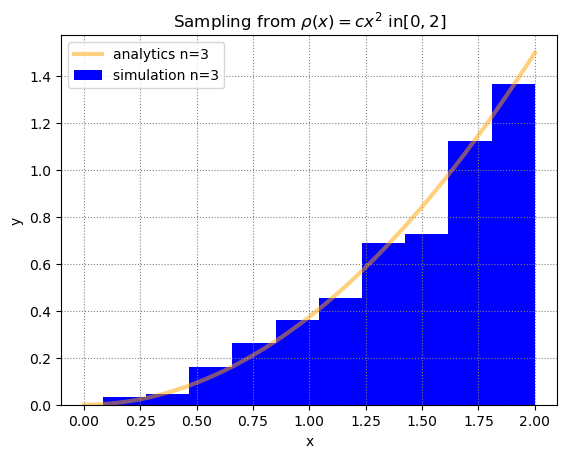

In [8]:
n = 2
c = 3/8

#simulation
x_sim = np.loadtxt("sampl_power_ext.txt")
y_sim  = power(x_sim, n, c)

#analytics
x = np.linspace(0,2,len(x_sim))
y = power(x, n, c)

plt.plot(x,y, '-', label = 'analytics n=3', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation n=3', color = 'blue', density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = c x^2$ in$ [0,2] $')
plt.legend()
plt.show()

Use the inversion method to design an algorithm that samples random numbers according to the following probability distribution:

$\rho (x) = \mu e^{-\mu x} $, with x in [0, Infinity]

First, calculate the Cumulative Distribution Function (CDF) of the given distribution. The CDF is defined as:

$CDF = \int_0^j {\mu} e^{-{\mu} x} \, dx = 1-e^{-j {\mu}}$

Now, we want to sample random numbers from this distribution. To do this, we use the inverse CDF method. We set the CDF equal to a random number 'u' sampled from a uniform distribution between 0 and 1; then we solve for 'j' to obtain:


$1-e^{-j {\mu}} = u \rightarrow j = \frac{Log(1-u)}{\mu}, \quad u \sim U(0,1)$

In [9]:
def exp1 (x, mu):
    return mu*np.exp(-mu*x)

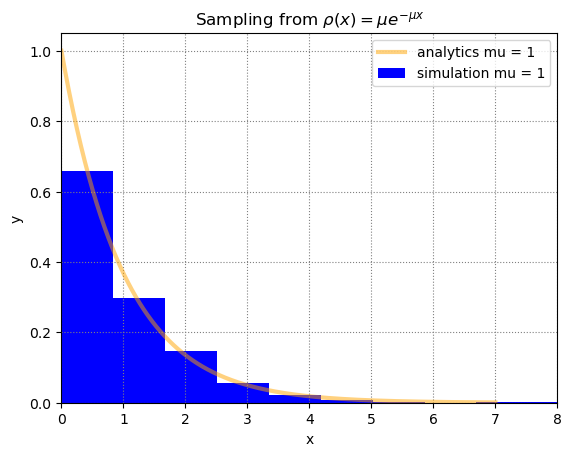

In [10]:
mu = 1.

#simulation
x_sim = np.loadtxt("sampl_exp.txt")
y_sim  = exp1(x_sim, mu)

#analytics
x = np.linspace(0,7,len(x_sim))
y = exp1(x, mu)

plt.plot(x,y, '-', label = 'analytics mu = 1', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, label = 'simulation mu = 1', color = 'blue', density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,8)
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) = \mu e^{-\mu x} $')
plt.legend()
plt.show()

Use the inversion method to design an algorithm that samples random numbers according to the following probability distribution:

$\rho (x) = 2x e^{- x^2} $, with x in [0, Infinity]

$CDF = \int_0^j 2x e^{- x^2} \, dx = 1-e^{-j^2}$

$1-e^{-j^2} = u \rightarrow j = \frac{Log(1-u)}{\mu}, \quad u \sim U(0,1)$

In [11]:
def exp2 (x, mu):
    return 2*x*np.exp(-x**2)

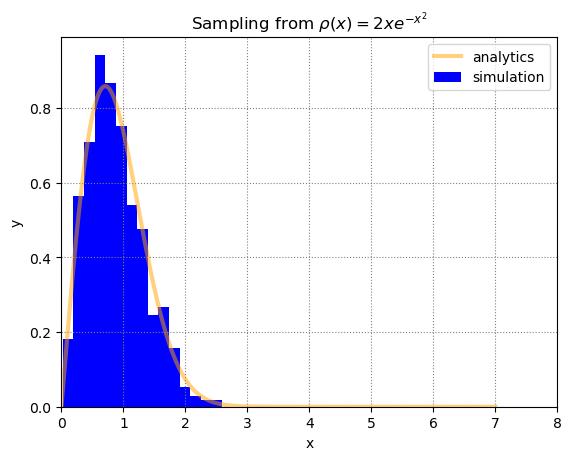

In [12]:
#simulation
x_sim = np.loadtxt("sampl_exp2.txt")
y_sim  = exp2(x_sim, mu)

#analytics
x = np.linspace(0,7,len(x_sim))
y = exp2(x, mu)

plt.plot(x,y, '-', label = 'analytics', color = 'orange',linewidth = 3, alpha=0.5)
_, _, _  = plt.hist(x_sim, bins=15, label = 'simulation', color = 'blue', density = True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,8)
plt.grid(color='grey', linestyle = 'dotted')
plt.title(r'Sampling from $\rho (x) =  2x e^{- x^2} $')
plt.legend()
plt.show()

## 2.3 Sampling via transformation of coordinates

### Unit radius disk
We want to sample points within a unit disk by setting r as a constant equal to 1 and θ (angle) as a random variable uniformly distributed between 0 and 2π. To do this, the following approach is used:

    - Generate a random angle θ uniformly distributed between 0 and 2π.

    - Set r to a constant value of 1 since you want to sample points within a unit disk.

    - Convert the polar coordinates (r and θ) to Cartesian coordinates (x and y) using the following equations:
        - x = r * cos(θ)
        - y = r * sin(θ)
        
The described algorithm, where we sample r from a uniform distribution between 0 and 1 and θ from a uniform distribution between 0 and 2π, will not sample points uniformly within the unit disk. <br>
The conceptual mistake here is that points with a larger r (i.e., closer to the edge of the square) will be sampled with the same frequency as points with a smaller r (i.e., closer to the center). However, in a unit circle, points closer to the center should be sampled less densely than points near the edge because there is more area to cover closer to the edges. <br>
As one can infer from the following plot, the points near the center of the circle are overrepresented, confirming that this method does not sample points uniformly within the unit disk. 

In [1]:
import math

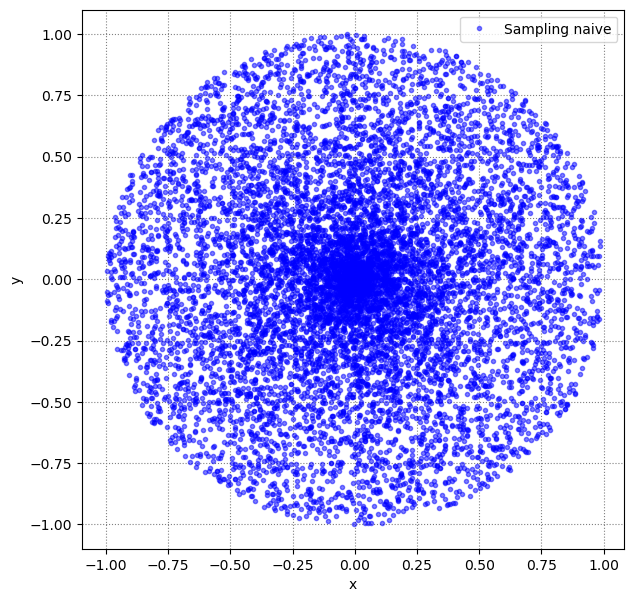

In [2]:
data = np.loadtxt("sampl_disk.txt")
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Sampling naive', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

As we mentioned above, to sample points uniformly within a unit disk, one need to account for the varying area of each concentric circle within the disk. Points closer to the center should be sampled less densely because they represent a smaller area.<br>
We want the proportion of points to be uniformly proportional to area rather than distance to the origin.

$$
\rho (x, y)dxdy = \frac{1}{{\pi}}  \, dx \, dy.
$$

Let us compute the Jacobian of the transformation from (x, y) to (r, θ):

$$
J = \begin{vmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{vmatrix}
= \begin{vmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{vmatrix}
= r(\cos^2(\theta) + \sin^2(\theta)) = r
$$
<br>

If we pass into polar coordinates the PDF becomes: 

$$
\rho (r,\theta)\, dr \, d\theta = \rho (x, y)\cdot r \, dx \, dy = \frac{r}{{\pi}}  \, dr \, d\theta.
$$

We marginalize (meaning integrate) over $\theta$ to compute $\rho (r)$ and we draw a sample from it using standard 1D techniques:
$$
\rho (r) = \int_0^{2\pi} \rho (r,\theta) \, d\theta = \int_0^{2\pi} \frac{r}{{\pi}} d\theta = 2r
$$
$$
CDF(r) = \int_0^{a} \rho (r) dr = \int_0^{a}2r dr = a^2  \\
a^2 = u_1 \rightarrow a = \sqrt{u_1}  \quad\quad \left\{ 
\begin{array}{ll} 
u_1 \sim U(0,1)\\
a \sim \rho (r)\end{array}\right.
$$

Then we compute the conditional probability $\rho(\theta | r)$ and we draw a sample from it:  $$
\rho (\theta | r) = \frac{\rho(\theta,r)}{\rho(r)} = \frac{1}{2 \pi}
$$
$$
CDF(\theta | r) = \int_0^{b} \rho (\theta | r) d\theta = \int_0^{b}\frac{1}{2 \pi} d\theta = \frac{1}{2 \pi} b  \\
\frac{1}{2 \pi} b = u_2 \rightarrow b = 2 \pi u_2  \quad\quad \left\{ 
\begin{array}{ll} 
u_2 \sim U(0,1)\\
b \sim \rho (\theta | r)\end{array}\right.
$$

We can conclude that the right sampling from a unit radius disk is: 
$$
x =  \sqrt{u_1} cos(2\pi u_2 ) \\
y =  \sqrt{u_1} sin(2\pi u_2 )
$$

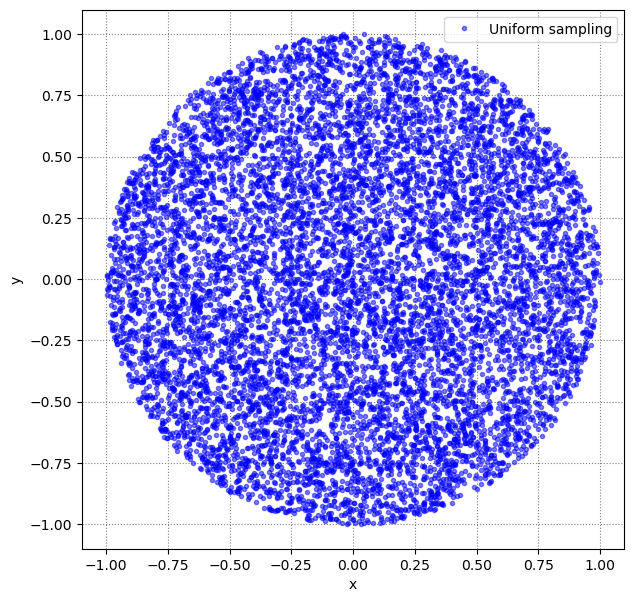

In [5]:
data = np.loadtxt("sampl_disk_corr.txt")
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Uniform sampling', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

### 2D Gaussian PDF
We want to draw two numbers X and Y from the (normalised) 2D Gaussian PDF:

$$
\rho (x, y)dxdy = \frac{1}{{2\pi}} \exp\left(\frac{-x^2+y^2}{2} \right) \, dx \, dy.
$$


Let us compute the Jacobian of the transformation from (x, y) to (r, θ):

$$
J = \begin{vmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{vmatrix}
= \begin{vmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{vmatrix}
= r(\cos^2(\theta) + \sin^2(\theta)) = r
$$
<br>

If we pass into polar coordinates the PDF becomes: 
$$
\rho(r, \theta) = r \, dr \, d\theta = \frac{1}{{2\pi}} \exp\left(-\frac{r^2}{2}\right) \, r \, dr \, d\theta
$$
with $r \in \mathcal{R}_{\geq 0}$ and $\theta \in [0,2\pi]$.<br>

Now the idea is to consider the marginal density function $\rho(r)$ obtained by integrating one of the dimensions and draw a sample from it using standard 1D techniques:
$$
\rho(r) =\int_0^{2\pi} \frac{1}{{2\pi}} \exp\left(-\frac{r^2}{2}\right) \, r \, d\theta = r\exp\left(-\frac{r^2}{2}\right)
$$
$$
CDF(\rho(r)) =\int_0^{a}\rho(r)dr = \int_0^{a} r\exp\left(-\frac{r^2}{2}\right)dr = 1-\exp\left(-\frac{a^2}{2}\right)
$$
$$
CDF(\rho(r)) =  1-\exp\left(-\frac{a^2}{2}\right) = u_1 \rightarrow a = \sqrt{- 2 Ln{(1-u_1)}} \quad u_1 \sim U(0,1)
$$

Then, given the sample $a \sim \rho(r)$ we compute the conditional density function given that value and draw a sample $b$ from the $\rho(\theta|r)$ again using 1D standard technique:
$$
\rho(\theta|r) = \frac{\rho(\theta,r)}{\rho(r)} = \frac{1}{2\pi}
$$
$$
CDF(\rho(\theta|r)) =\int_0^{b}\rho(\theta|r)d\theta =\int_0^{b}\frac{1}{2 \pi}d\theta =  \frac{1}{2 \pi}b
$$
$$
CDF(\rho(\theta|r)) = \frac{1}{2 \pi}b =u_2  \rightarrow b = 2\pi u_2 \quad u_2 \sim U(0,1)
$$
At the end we have that:
$$
a = \sqrt{- 2 Ln{(1-u_1)}} \sim \rho(r) \\
b = 2\pi u_2 \sim \rho(\theta|r)
$$
We can conclude that: 
$$
x =  \sqrt{- 2 Ln{(1-u_1)}} cos(2\pi u_2 ) \\
y =  \sqrt{- 2 Ln{(1-u_1)}} sin(2\pi u_2 )
$$

Despite the strong coupling between $u_1$ and $u_2$ in each of the two formulas above, the generated x and y coordinates, which are both standard Gaussians, are still independent from each other. Note that $1-u$ can be simply replaced by $u$ in the previous equations.

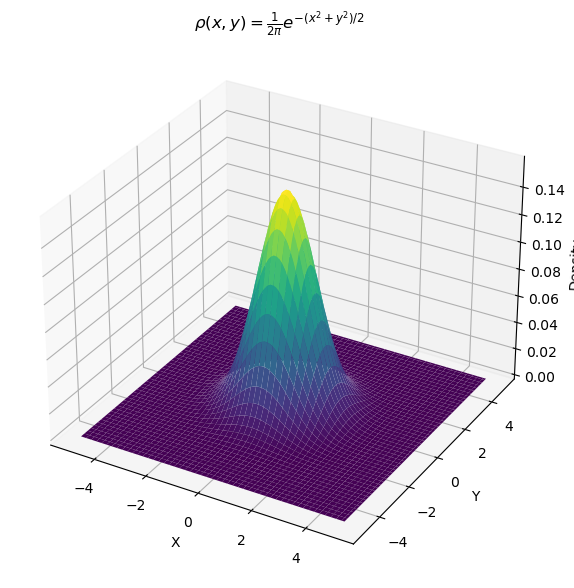

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# 2d gaussian PDF
def rho(x, y):
    return 1 / (2 * np.pi) * np.exp(-(x**2 + y**2) / 2)

# grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rho(X, Y)

#3D plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title(r'$\rho(x, y) = \frac{1}{{2\pi}} e^{-(x^2 + y^2)/2}$')
plt.show()


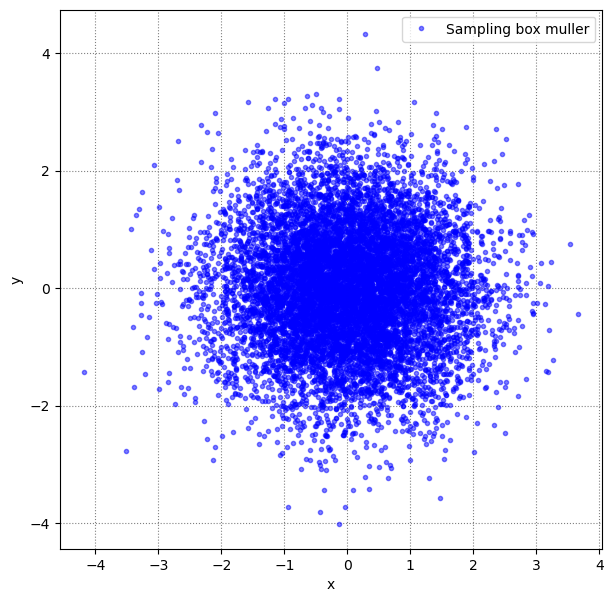

In [21]:
x = np.loadtxt("sampl_gauss_X.txt")
y = np.loadtxt("sampl_gauss_Y.txt")

plt.figure(figsize=(7,7))
plt.plot(x,y, '.', label = 'Sampling box muller', color = 'blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

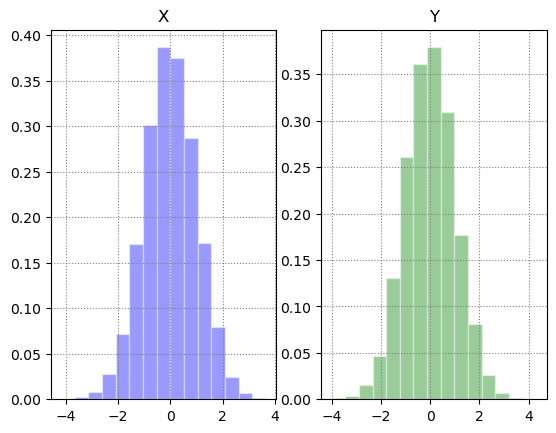

In [43]:
fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(x, bins=15, color='blue', density=True, edgecolor='white', alpha = 0.4)
ax1.set_title("X")
ax1.grid(color='grey', linestyle ='dotted')
temp = ax2.hist(y, bins=15, color='green', density=True, edgecolor='white', alpha = 0.4)
ax2.set_title("Y")
ax2.grid(color='grey', linestyle ='dotted')
plt.show()

One can extend the algorithm to sample from $\mathcal{N}(\mu, \sigma ^2)$:
$$
\mathcal{N}(x, y) = \frac{1}{{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2} \left( (x - \mu_x)^2 + (y - \mu_y)^2 \right) \right) \, dx \, dy
$$

$$
x =  \sqrt{- 2 Ln{(1-u_1)}} cos(2\pi u_2 )\sigma + \mu \\
y =  \sqrt{- 2 Ln{(1-u_1)}} sin(2\pi u_2 )\sigma + \mu
$$

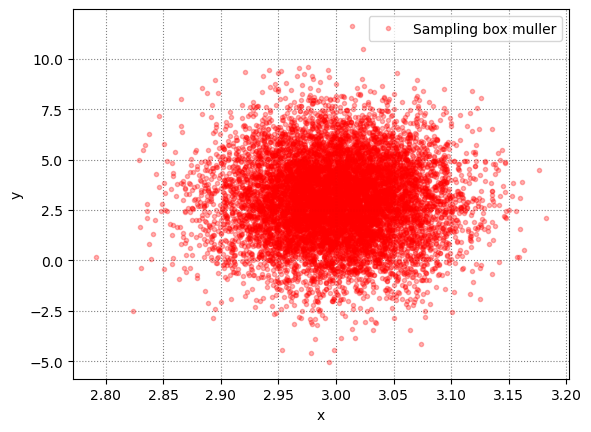

In [58]:
x = np.loadtxt("sampl_gauss_X.txt")
y = np.loadtxt("sampl_gauss_Y.txt")

#transformation
sigma_x = 0.05
sigma_y = 2
mean = 3
x = sigma_x*x + mean
y = sigma_y*y + mean

plt.plot(x,y, '.', label = 'Sampling box muller', color = 'red', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle = 'dotted')
plt.legend()
plt.show()

### 2.3.1 Rejection method
We want to use the rejection method to generate random numbers that are distributed according to the pdf:
$$
f(x) = \sqrt{\frac{2}{\pi}} e^{-x^2} .
$$

We define a second pdf $g(x)$ from which we can easily generate random numbers and such that $f(x) \leq c g(x)$, $\forall x$ where $c > 1$ is a
constant. The density g will be referred to as the “candidate density” and f will be the “target density".

To facilitate sampling, we can define the function g(x) in the following manner:

$$
g(x, p, \sigma) = 
\left\{ 
\begin{array}{ll} 
A  \quad\quad \text{if } x \leq p \\
A \cdot \exp\left(-\frac{(x - p)^2}{2 \sigma^2}\right) \quad\quad \text{if } x > p
\end{array}\right.
$$

With this definition, the sampling is straightforward: for values in the range [0, p], the sample is uniformly distributed, and for values in the range [p, ∞), the sample follows a Gaussian distribution.
Here's a rewritten version of the algorithm description:

The algorithm proceeds through the following steps:

1. Generate a random variable X from the distribution g(x) and generate a uniform random number U in the interval [0, 1].
2. If $U \geq f(x) / c g(X)$, return to step 1 and obtain new values for X and U. Otherwise, save the value of X.

##### Normalization constant and choiche of p
If we choose $p=1$, the value of $g(x)$ for $x\leq p$ is $A = \frac{1}{p} = 1$. <br>
In general $c = \frac{A}{0.8}$ where $0.8$ is an approximation of the value of $f(x)$ in 0.
In that way we satisfy the condition $f(x) \leq c g(x)$, $\forall x$ where $c > 1$.

##### p=1

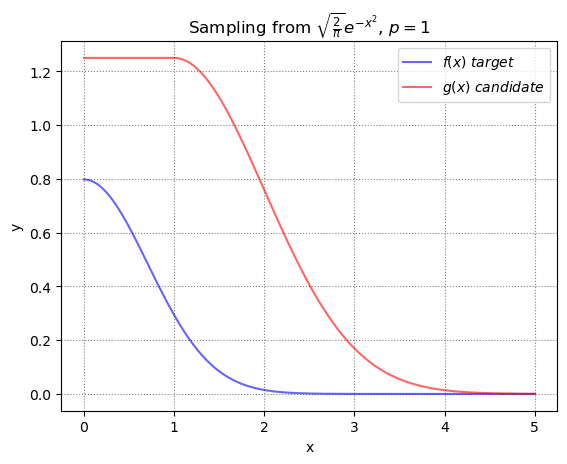

In [24]:
def f(x):
    return np.sqrt(2.0 / np.pi) * np.exp(-x**2)

def g(x, p, sigma):
    r = np.where(x <= p, A, A * np.exp(-((x - p)**2) / (2 * sigma**2)))
    return r

p = 1.
sigma = 1 
A = 1.0/p
c = A / 0.8
x = np.linspace(0, 5, 200)

y_target = f(x)
y_candidate = c*g(x, p, sigma)

plt.plot(x, y_target, '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.plot(x, y_candidate, '-', label=r'$g(x)$ $ candidate$', color='red', alpha=0.6)  # Updated the label for g(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dotted')
plt.title(r'Sampling from $\sqrt{\frac{2}{\pi}} e^{-x^2} $, $p=1$')
plt.legend()
plt.show()


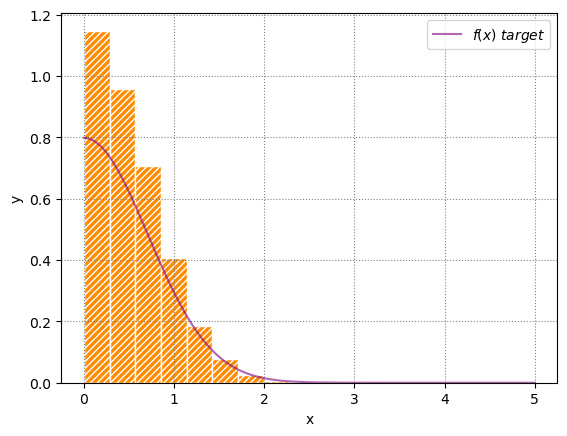

In [17]:
x_sampling1 = np.loadtxt("sampl_rejection_to_p.txt")
x_sampling2= np.loadtxt("sampl_rejection_from_p.txt")
concatenated_array = np.concatenate((x_sampling1, x_sampling2))

plt.hist(concatenated_array, density=True, bins=10,color='darkorange', edgecolor='white', hatch='/////')
plt.plot(x, y_target, '-', label=r'$f(x)$ $target$', color='purple', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

##### p = 0.85

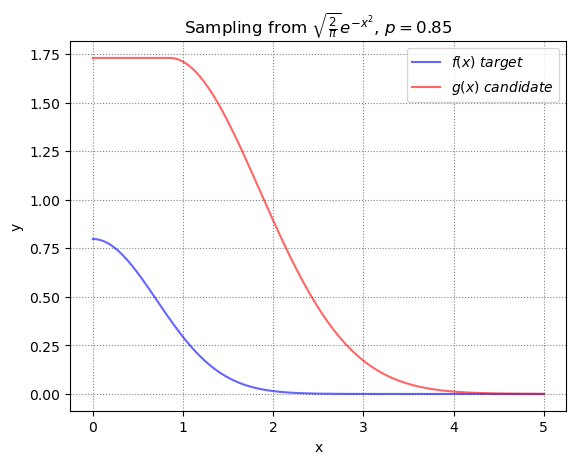

In [25]:
p = 0.85
sigma = 1 
A = 1.0/p
c = A / 0.8
x = np.linspace(0, 5, 200)

y_target = f(x)
y_candidate = c*g(x, p, sigma)

plt.plot(x, y_target, '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.plot(x, y_candidate, '-', label=r'$g(x)$ $ candidate$', color='red', alpha=0.6)  # Updated the label for g(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dotted')
plt.title(r'Sampling from $\sqrt{\frac{2}{\pi}} e^{-x^2} $, $p=0.85$')
plt.legend()
plt.show()


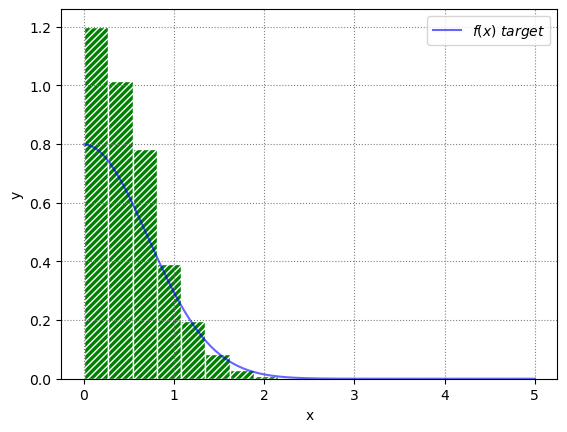

In [29]:
x_sampling1 = np.loadtxt("sampl_rejection_to_p.txt")
x_sampling2= np.loadtxt("sampl_rejection_from_p.txt")
concatenated_array = np.concatenate((x_sampling1, x_sampling2))

plt.hist(concatenated_array, density=True, bins=10,color='green', edgecolor='white', hatch='/////')
plt.plot(x, y_target, '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

## 2.4 Importance sampling

Importance sampling is a methodology to approximate integrals of the form $I = E[f(x);p] = \int f(x)p(x)dx $ where $p(x)$ is a probability density function. The basic idea of importance sampling is to sample the states from a different distribution to lower the variance of the estimation of $E[f(x);p]$, or when sampling from $p$ is difficult (because it cannot be easily normalized) or because sampling from $p$ is inefficient.

#### Exercise a

Let us consider the following function $f(x) = e^x g(x) $ in $[0, \infty]$ where $ g(x) $ is a slowly varying function (meaning a function that changes relatively slowly compared to some other parameter). Compute the integral both with the crude method and by using the importance sampling technique.


We choose as slowly varying function $g(x)$, the logarithm function $g(x) = \ln{x}$. To show why $ \ln{x} $ is slowly varying, we consider the defition and compute the limit:

$$
\lim_{{x \to \infty}} \frac{\ln{ax}}{\ln{x}}
$$

where $a > 0$ is constant. We want to show that this limit is equal to 1 for all $a$:
$$
\lim_{{x \to \infty}} \frac{\ln{ax}}{\ln{x}} = \lim_{{x \to \infty}} \frac{\ln{a} + \ln{x}}{\ln{x}} =1
$$

Therefore, $ \ln{x} $ is a slowly varying function. 

#### Crude Monte Carlo method
the Crude Monte Carlo method to compute an integral of the form $\int_{a}^{b} f(x)$ is:
$$
I_N = \frac{b-a}{N} \sum_{i=1}^{N}  f_i 
$$
where $x$ is a random number $x \in [a, b]$ and $fi = f (x)$.

#### Importance sampling
For importance sampling method we use a Gaussian random number generator with $p$ the importance density $ W(x) = \sqrt{ \frac{2}{\pi}} e^{-x^2} $. With this choice one has
$$
I = \frac{1}{N} \int_{0}^{N} f(x) \approx \frac{1}{N} \sum_{i = 1}^{N} \frac{f(x_i)}{W(x_i)} \approx \frac{\pi}{2} \sum_{i=1}^{N} \frac{g(x_i)}{N}
$$
where $x_i$ is sampled from $ W(x)$ so it can be seen as $\sqrt 2$ times a gaussian random number with $\mu = 0$ and $\sigma^2 = \frac{1}{2}$, if $x \geq 0$ .


Finally we obtain the following results for $N = 1e7$:<br>
- The analytical integral estimation is:$-0.870058$;<br>
- The integral estimation with crude Monte Carlo is: $-0.83833$;<br>
- The integral estimation with Importance Sampling is: $-0.796144$.<br>


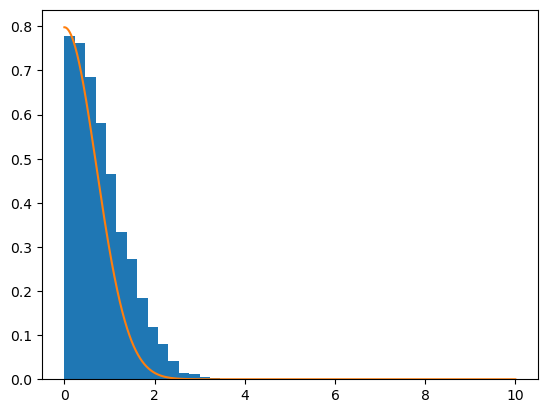

In [14]:
mean = 0.0  # Mean of the distribution
std = 1/np.sqrt(2.0)   # Standard deviation of the distribution
num_samples = 10000  # Number of random numbers to generate

# Generate random numbers from a Gaussian distribution
random_numbers = np.random.normal(loc=mean, scale=std, size=num_samples)
x = np.linspace(0,10,num_samples)
y = np.sqrt(2/math.pi)*np.exp(-x*x)
_,_,_ = plt.hist(np.abs(random_numbers)*np.sqrt(2.0), density = True, bins = 16)
plt.plot(x,y,'-')

#### Exercise b
In this exercise we want to estimate the integral of $\int_0^{\frac{\pi}{2}} \cos(x) dx$ using importance sampling with the weight function $g(x) \propto a + bx^2$. In order to to that, we need to find the optimal values of the parameters $a$ and $b$ and to determine the number of iterations needed to achieve a 1% accuracy.


#### Proposal function g(x)
$$\int_0^{\frac{\pi}{2}} \cos(x) dx = \int_0^{\frac{\pi}{2}} \frac{\cos(x)}{g(x)} g(x) dx$$

In this case, we are considering $g(x) \propto a + bx^2$. To make it a proper probability density function, we normalize it:

$$\int_0^{\frac{\pi}{2}} \frac{1}{Z} (a + bx^2) dx = 1$$

$$Z = \int_0^{\frac{\pi}{2}} (a + bx^2) dx$$

At this point, the first step to take is to cleverly determine the values of a and b (coefficients of  g(x)) in such a way that, during the importance sampling algorithm, the part contributing the most to the integral is sampled more frequently. In our case, the region of interest for $\int_0^{\frac{\pi}{2}} \cos(x) dx$ is located in the first half of the curve:
<img src="fx.png" style="height:250px" />

Following this reasoning, a good choice of the proposal function is $g(a = 1, b = -0.5, x)$, for which the maximum is indeed in zero.

#### Importance sampling algorithm

We generate $x$ random variables from the probability density $g(x)$ to estimate the integral. In order to sample from g(x) we use as usual the inverse transform method. Since it is challenging to invert a third-degree polynomial we use Mathematica software to do that. An alternative approach involves using Cardano's formulas. <br>
For each sampled $x$, we have to compute the corresponding weight $w(x) = \frac{\cos(x)}{g(x)}$.

The final estimation of the integral will be:
$$\int_0^{\frac{\pi}{2}} \cos(x) dx \approx \frac{1}{N} \sum_{i=1}^N w(x_i) =\frac{1}{N} \sum_{i=1}^N \frac{\cos(x)}{g(x)} \quad\quad x_i \sim g(x) $$

  where $N$ is the number of samples.

Finally we want to estimate the required number of iterations to achieve a 1% accuracy. We will assess the algorithm's performance by plotting the integral estimate as the number of samples varies and the variance as the number of samples changes.

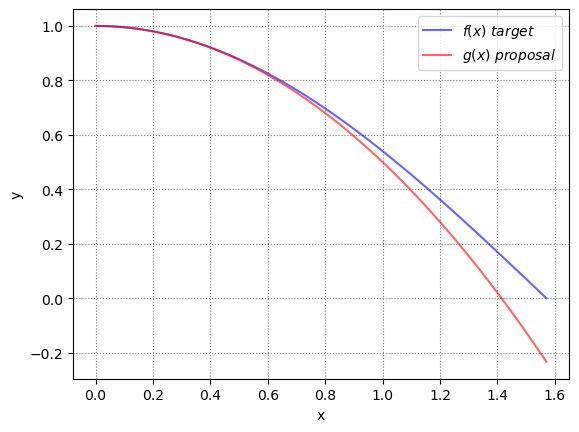

In [16]:
x = np.linspace(0,math.pi/2,100)
a=1
b=-0.5

plt.plot(x, np.cos(x), '-', label=r'$f(x)$ $target$', color='blue', alpha=0.6)
plt.plot(x, a+b*x*x, '-', label=r'$g(x)$ $ proposal$', color='red', alpha=0.6)  # Updated the label for g(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()


In [19]:
data = np.loadtxt("mean_std_N.txt")
x = data[:,0]
Mean = data[:,1]
Std = data[:,2]

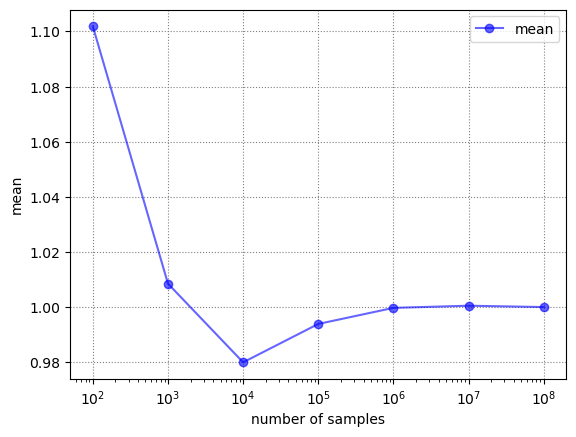

In [35]:
plt.plot(x, Mean, '-o', label='mean', color='blue', alpha=0.6)
plt.xlabel('number of samples')
plt.ylabel('mean')
plt.xscale('log')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

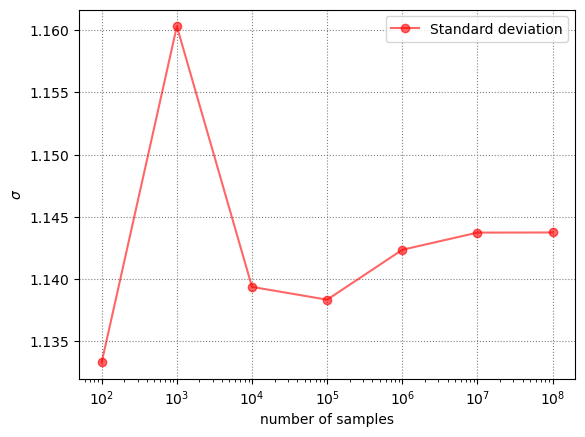

In [32]:
plt.plot(x, Std, 'o-', label='Standard deviation', color='red', alpha=0.6)  
plt.xlabel('number of samples')
plt.ylabel(r'$\sigma$')
plt.xscale('log')
plt.grid(color='grey', linestyle='dotted')
plt.legend()
plt.show()

As the number of samples increases, the estimation of the integral using importance sampling gradually converges towards a value that coincides with the analytical result of the integral, and the variance stabilizes.